In [29]:
# Mudasir
# 22K-8732
# LAB-2 Computer Vision (CV)

In [30]:
# 1) Uploading image function will use for all task

import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()

xray_img = cv2.imread("X-Ray Image.jpg", cv2.IMREAD_GRAYSCALE)

def show(img, title="", cmap='gray'):
    plt.figure(figsize=(6,5))
    if len(img.shape)==2:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

print("Images loaded successfully!")

Saving X-Ray Image.jpg to X-Ray Image (5).jpg
Images loaded successfully!


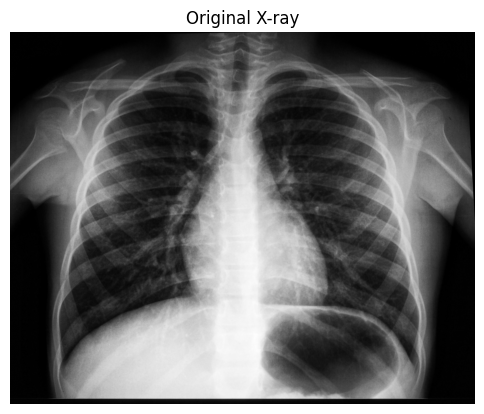

In [31]:
# Task 1: Enhancing and Analyzing Medical Image Quality

# Load and Display
show(xray_img, title="Original X-ray")

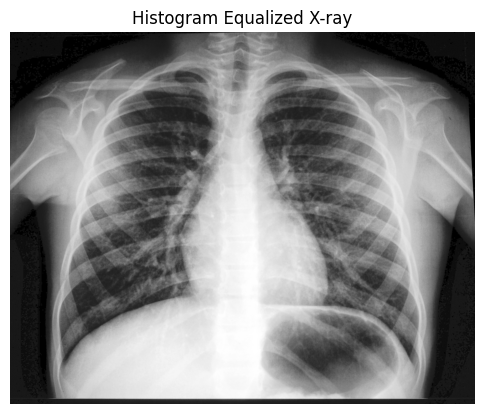

In [32]:
# Contrast Enhancement (Histogram Equalization)
eq_xray = cv2.equalizeHist(xray_img)
show(eq_xray, title="Histogram Equalized X-ray")

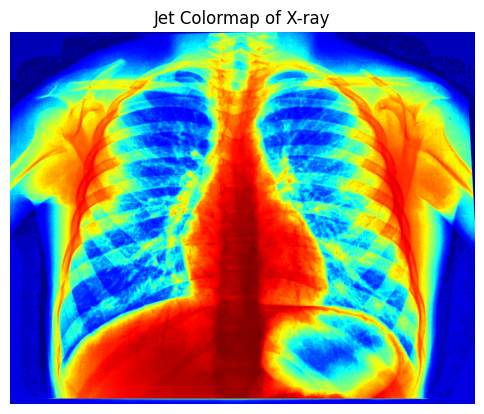

In [33]:
# Color Mapping (Jet)
jet_xray = cv2.applyColorMap(eq_xray, cv2.COLORMAP_JET)
show(jet_xray, title="Jet Colormap of X-ray")

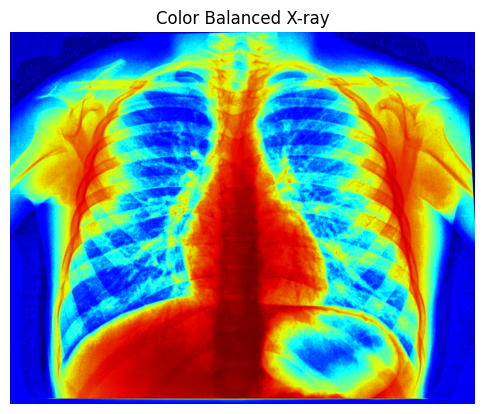

In [34]:
# Color Balance
b,g,r = cv2.split(jet_xray)
b = np.clip(b*1.1,0,255).astype(np.uint8)
g = np.clip(g*1.0,0,255).astype(np.uint8)
r = np.clip(r*0.9,0,255).astype(np.uint8)
balanced_xray = cv2.merge([b,g,r])
show(balanced_xray, title="Color Balanced X-ray")

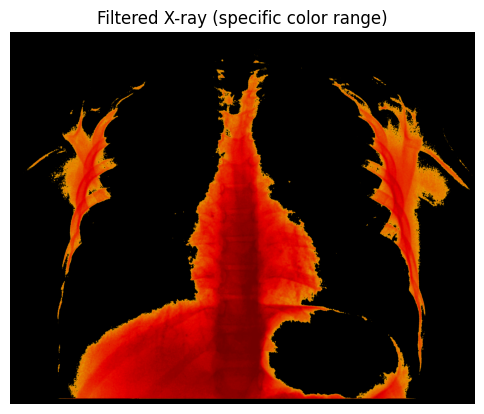

In [35]:
# Color Filtering
hsv = cv2.cvtColor(balanced_xray, cv2.COLOR_BGR2HSV)
lower = np.array([0, 50, 50])
upper = np.array([20, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
filtered = cv2.bitwise_and(balanced_xray, balanced_xray, mask=mask)
show(filtered, title="Filtered X-ray (specific color range)")

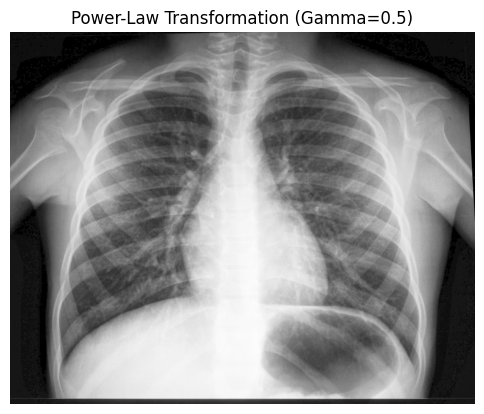

In [36]:
# Power-Law Transformation (Gamma)
gamma = 0.5
gamma_xray = np.array(255 * (xray_img/255) ** gamma, dtype='uint8')
show(gamma_xray, title="Power-Law Transformation (Gamma=0.5)")

📂 Please upload your X-ray image (JPG format)


Saving X-Ray Image.jpg to X-Ray Image (6).jpg


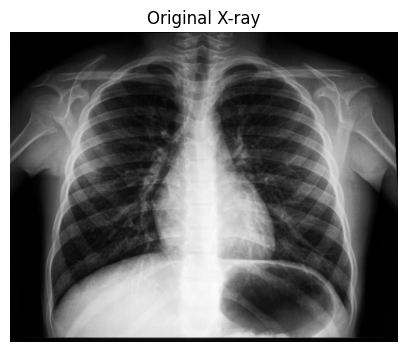

📂 Please upload your MRI image (JPG format)


Saving MRI Images.jpg to MRI Images (2).jpg


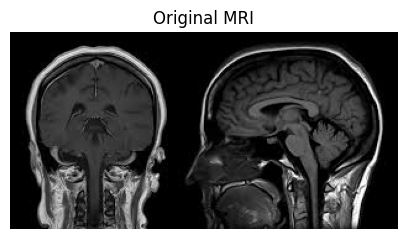

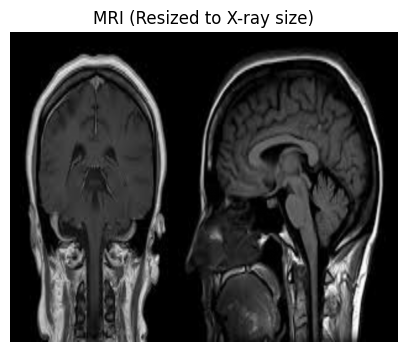

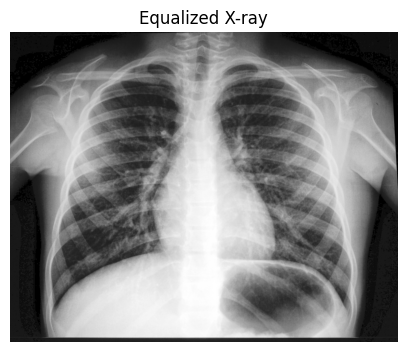

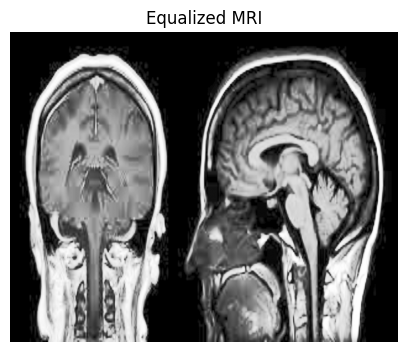

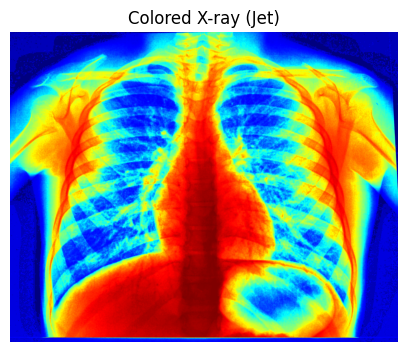

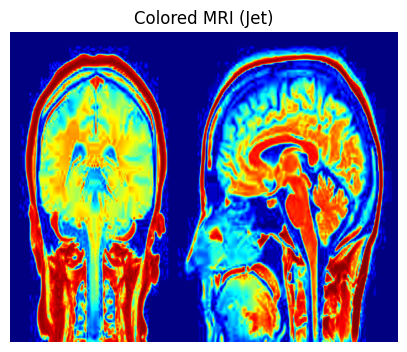

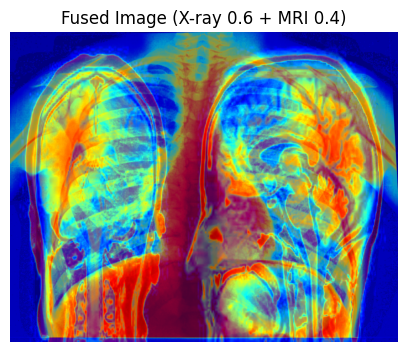

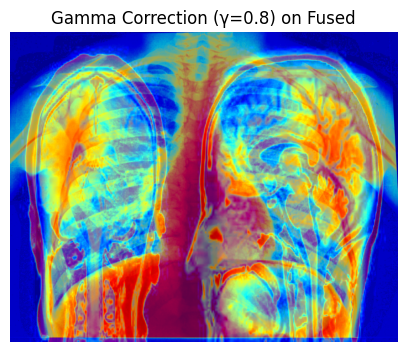

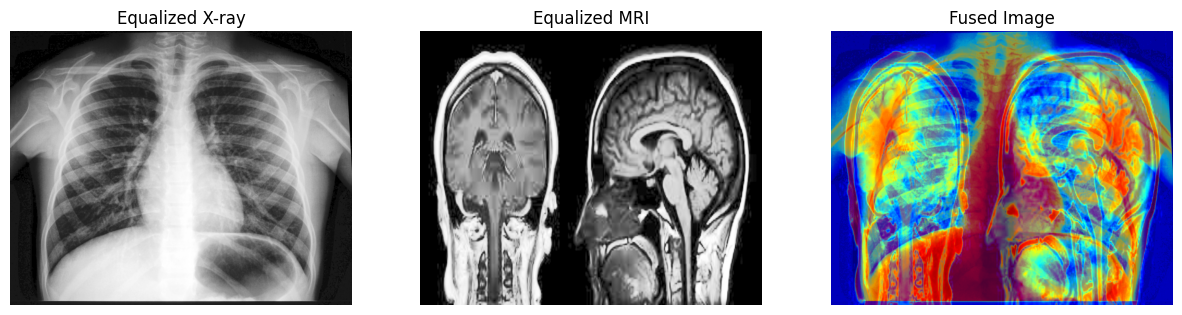

In [37]:
# Task 2: Enhancing Multi-Modal Medical Image Fusion

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def show(img, title="", cmap='gray'):
    plt.figure(figsize=(5,5))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Upload X-ray Image
print("📂 Please upload your X-ray image (JPG format)")
uploaded_xray = files.upload()
xray_filename = list(uploaded_xray.keys())[0]
xray_img = cv2.imread(xray_filename, cv2.IMREAD_GRAYSCALE)

if xray_img is None:
    raise Exception("❌ Error: X-ray image not loaded. Check file format.")

show(xray_img, "Original X-ray")

# Upload MRI Image
print("📂 Please upload your MRI image (JPG format)")
uploaded_mri = files.upload()
mri_filename = list(uploaded_mri.keys())[0]
mri_img = cv2.imread(mri_filename, cv2.IMREAD_GRAYSCALE)

if mri_img is None:
    raise Exception("❌ Error: MRI image not loaded. Check file format.")

show(mri_img, "Original MRI")

# Resize MRI to match X-ray size
h, w = xray_img.shape
mri_resized = cv2.resize(mri_img, (w, h))
show(mri_resized, "MRI (Resized to X-ray size)")

# Histogram Equalization
eq_xray = cv2.equalizeHist(xray_img)
eq_mri  = cv2.equalizeHist(mri_resized)
show(eq_xray, "Equalized X-ray")
show(eq_mri, "Equalized MRI")

# Apply Jet Colormap
color_xray = cv2.applyColorMap(eq_xray, cv2.COLORMAP_JET)
color_mri  = cv2.applyColorMap(eq_mri,  cv2.COLORMAP_JET)
show(color_xray, "Colored X-ray (Jet)")
show(color_mri,  "Colored MRI (Jet)")

# Weighted Fusion
fused = cv2.addWeighted(color_xray, 0.6, color_mri, 0.4, 0)
show(fused, "Fused Image (X-ray 0.6 + MRI 0.4)")

# Power-Law (Gamma) Transformation on Fused
gamma = 0.8
gamma_fused = np.array(255 * (fused/255) ** gamma, dtype='uint8')
show(gamma_fused, f"Gamma Correction (γ={gamma}) on Fused")

# Comparative Analysis
plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(eq_xray, cmap='gray'); plt.title("Equalized X-ray"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(eq_mri, cmap='gray'); plt.title("Equalized MRI"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(cv2.cvtColor(fused, cv2.COLOR_BGR2RGB)); plt.title("Fused Image"); plt.axis("off")
plt.show()


In [39]:
# Task 3: Real-Time Video Enhancement and Analysis

import cv2
import numpy as np

def find_camera():
    """Find available camera"""
    for i in range(5):  # Try camera indices 0-4
        cap = cv2.VideoCapture(i)
        if cap.isOpened():
            ret, frame = cap.read()
            if ret:
                print(f"Camera found at index {i}")
                cap.release()
                return i
            cap.release()
    return None

def realtime_video():
    # Find available camera
    camera_index = find_camera()

    if camera_index is None:
        print("No camera found! Try these solutions:")
        print("1. Check camera is connected")
        print("2. Close other apps using camera")
        print("3. Try: pip install opencv-python")
        print("4. On Linux: sudo apt install v4l-utils")
        print("5. Check camera permissions")
        return

    cap = cv2.VideoCapture(camera_index)
    print("Press 'q' to quit")
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame")
            break

        # Convert to grayscale
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Resize for better performance
        gray = cv2.resize(gray, (640, 480))

        # Histogram Equalization
        eq = cv2.equalizeHist(gray)

        # Log Transform
        c = 255 / np.log(1 + np.max(gray))
        log_img = (c * np.log(1 + gray.astype(np.float32))).astype(np.uint8)

        # Gamma Correction
        gamma_img = np.array(255 * (gray/255) ** 0.6, dtype='uint8')

        # Stack horizontally
        top_row = np.hstack([gray, eq])
        bottom_row = np.hstack([log_img, gamma_img])
        stacked = np.vstack([top_row, bottom_row])

        # Add labels
        cv2.putText(stacked, "Original", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(stacked, "Equalized", (650, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(stacked, "Log Transform", (10, 510), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        cv2.putText(stacked, "Gamma Corrected", (650, 510), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Create heatmap
        heat = cv2.applyColorMap(eq, cv2.COLORMAP_JET)

        # Display windows
        cv2.imshow("Video Enhancement", stacked)
        cv2.imshow("Heatmap", heat)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

realtime_video()

No camera found! Try these solutions:
1. Check camera is connected
2. Close other apps using camera
3. Try: pip install opencv-python
4. On Linux: sudo apt install v4l-utils
5. Check camera permissions
